Notebook to generate Figure 4. The is a single annular feature with both halves of the feature.

In [1]:
%load_ext autoreload
%autoreload 2
from extremefill2D.tools import getSMTRecords, smt_ipy_table
records = getSMTRecords(tags=['annular58'], path='../extremefill2D')
for r in records:
    if r.label[:8] == 'f3bad99d':
        record = r
print record.label

Created Django record store using PostgreSQL
f3bad99db4ef


Label,Timestamp,Parameters,Duration,Version,Tags
f3bad99d,2013-09-26 17:13,"kPlus: 545.559478117, kMinus: 37926901.9073, appliedPotential: -0.45, bulkSuppressor: 0.06, Nx: 200",9h 5m 37.11s,0ddd5ef30595,annular58


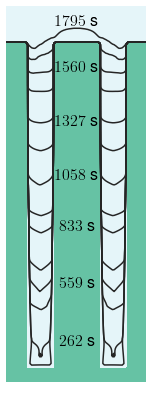

In [2]:
from extremefill2D.contourViewer import ContourViewer

fig = plt.figure(figsize=(2.5, 8), dpi=200)
ax = plt.subplot(1, 1, 1)
viewer = ContourViewer(record, ax=ax)
all_spines = ['top', 'bottom', 'right', 'left']
for spine in all_spines:
    ax.spines[spine].set_visible(False)
#plt.text(0.32, 0.01, '$\\texttt{{{0}}}$'.format(record.label[:8]), fontsize=12, transform=ax.transAxes)
viewer.plot(times = np.arange(40)[:15] * 5000. / 39, mirror=True, cutoff=True, cutoffvalue=0., show=False)

for t, h in zip(viewer.elapsedTimes[2::2], (0.13, 0.28, 0.43, 0.56, 0.7, 0.84, 0.96)):
    plt.text(0.5, h, '${0}$ s'.format(int(t)),
             horizontalalignment='center',
             verticalalignment='center',
             transform = viewer.ax.transAxes,
             fontsize=16)


plt.savefig('../figures/fig4.png')
smt_ipy_table([record],
              fields=['label', 'timestamp', 'parameters', 'duration', 'version', 'tags'],
              parameters=['kPlus', 'kMinus', 'appliedPotential', 'bulkSuppressor', 'Nx'])